<a href="https://colab.research.google.com/github/ThugCodeNinja/LGMVIP--DataScience/blob/main/StockMarket_Prediction_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
dataset='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'


In [3]:
stockdata=pd.read_csv(dataset,parse_dates=True)

In [4]:
stockdata.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
stockdata.shape

(2035, 8)

In [6]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
stockdata.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

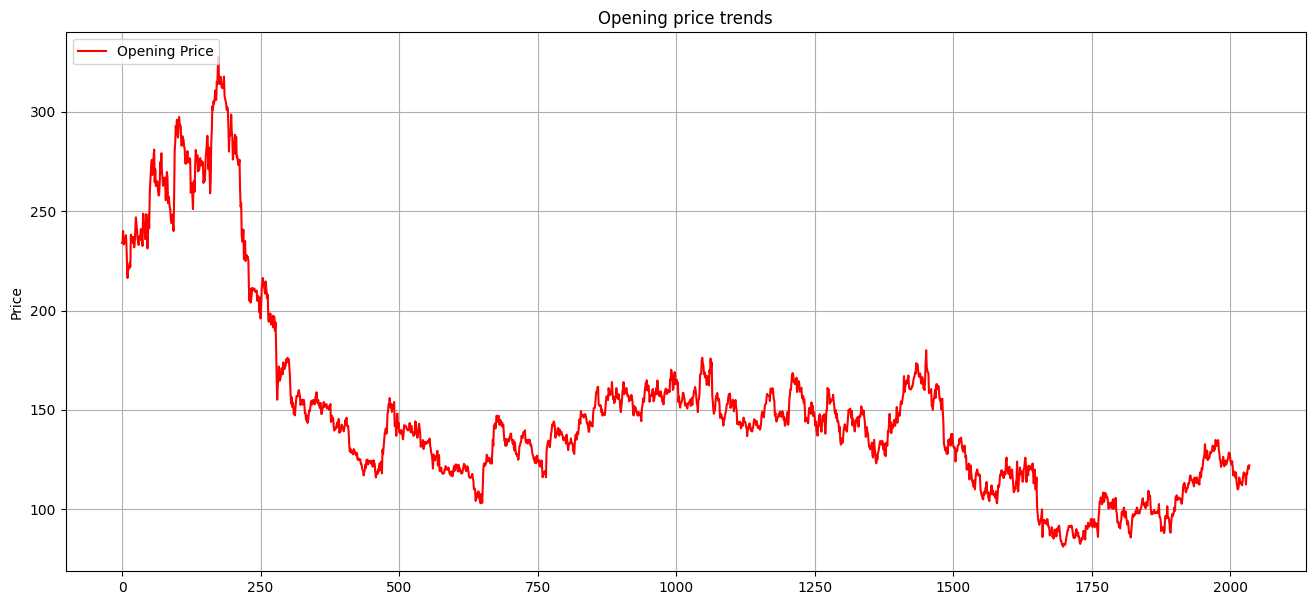

In [9]:
stockdata.reset_index()
plt.figure(figsize=(10,6))
stockdata['Open'].plot(kind='line',figsize=(16,7),color='r',label="Opening Price")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Opening price trends")
plt.grid()


Text(0.5, 1.0, 'Last')

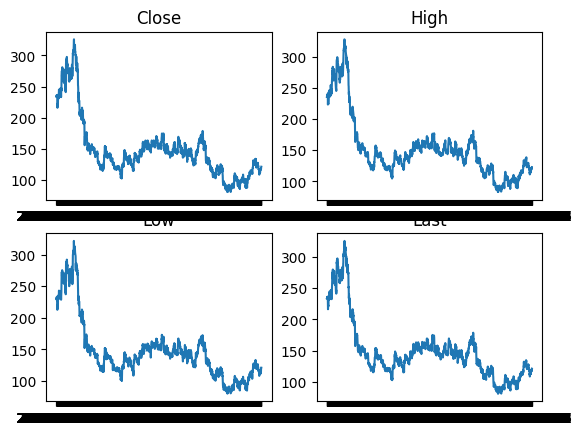

In [10]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(stockdata['Date'],stockdata['Close'])
axis[0,0].set_title('Close')
axis[0, 1].plot(stockdata['Date'],stockdata['High'])
axis[0,1].set_title('High')
axis[1, 0].plot(stockdata['Date'],stockdata['Low'])
axis[1,0].set_title('Low')
axis[1, 1].plot(stockdata['Date'],stockdata['Last'])
axis[1,1].set_title('Last')


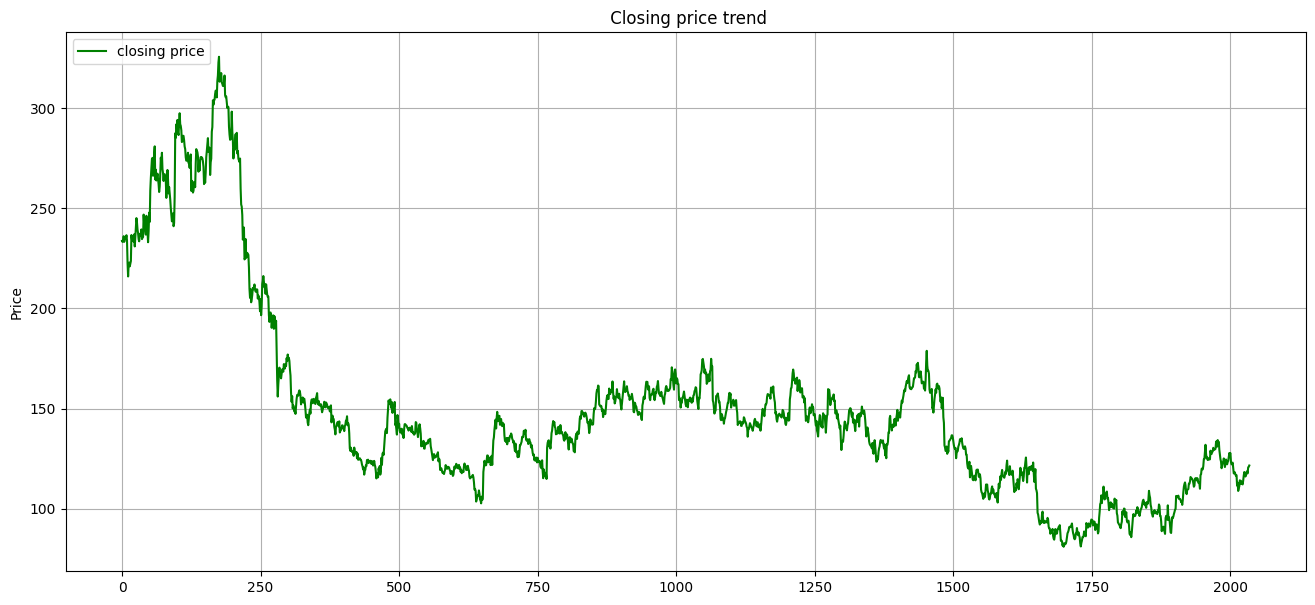

In [11]:
stockdata.reset_index()
plt.figure(figsize=(10,6))
stockdata['Close'].plot(kind='line',figsize=(16,7),color='g',label="closing price")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title(" Closing price trend")
plt.grid()


In [12]:
stockdata["Date"]=pd.to_datetime(stockdata.Date,format="%Y-%m-%d")
stockdata.index=stockdata['Date']

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
del stockdata['Date']
stockdata=scaler.fit_transform(np.array(stockdata).reshape(-1,1))
print(stockdata)

[[6.74900307e-06]
 [6.81409168e-06]
 [6.61711301e-06]
 ...
 [2.89507258e-06]
 [2.25627576e-02]
 [2.62587982e-05]]


In [14]:
tr_size=int(len(stockdata)*0.7)
te_size=len(stockdata)-tr_size
tr_data,te_data=stockdata[0:tr_size,:],stockdata[tr_size:len(stockdata),:1]

In [15]:
tr_size,te_size

(9971, 4274)

In [16]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)

In [17]:
time_step = 100
X_train, y_train = create_dataset(tr_data, time_step)
X_test, ytest = create_dataset(te_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(9870, 100)
(9870,)


(None, None)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(45,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(45,return_sequences=True))
model.add(LSTM(45))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 45)           8460      
                                                                 
 lstm_1 (LSTM)               (None, 100, 45)           16380     
                                                                 
 lstm_2 (LSTM)               (None, 45)                16380     
                                                                 
 dense (Dense)               (None, 1)                 46        
                                                                 
Total params: 41,266
Trainable params: 41,266
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=75,batch_size=128,verbose=1)

Epoch 1/75
78/78 [==============================] - 14s 40ms/step - loss: 0.0017 - val_loss: 9.7361e-04
Epoch 2/75
78/78 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 9.0613e-04
Epoch 3/75
78/78 [==============================] - 1s 19ms/step - loss: 0.0015 - val_loss: 7.8898e-04
Epoch 4/75
78/78 [==============================] - 2s 20ms/step - loss: 0.0014 - val_loss: 8.0815e-04
Epoch 5/75
78/78 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 7.5069e-04
Epoch 6/75
78/78 [==============================] - 1s 14ms/step - loss: 0.0013 - val_loss: 7.2875e-04
Epoch 7/75
78/78 [==============================] - 1s 14ms/step - loss: 0.0013 - val_loss: 7.3925e-04
Epoch 8/75
78/78 [==============================] - 1s 14ms/step - loss: 0.0013 - val_loss: 7.1201e-04
Epoch 9/75
78/78 [==============================] - 1s 16ms/step - loss: 0.0010 - val_loss: 5.1993e-04
Epoch 10/75
78/78 [==============================] - 2s 20ms/step - loss

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

131/131 [==============================] - 1s 5ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1164135.0488750578

In [26]:
math.sqrt(mean_squared_error(ytest,test_predict))

879976.3913204896

In [27]:
temp=100
trPrPlot = np.empty_like(stockdata)
trPrPlot[:, :] = np.nan
trPrPlot[temp:len(train_predict)+temp, :] = train_predict

In [28]:
tsPrPlot = np.empty_like(stockdata)
tsPrPlot[:, :] = np.nan
tsPrPlot[len(train_predict)+(temp*2)+1:len(stockdata)-1, :] = test_predict

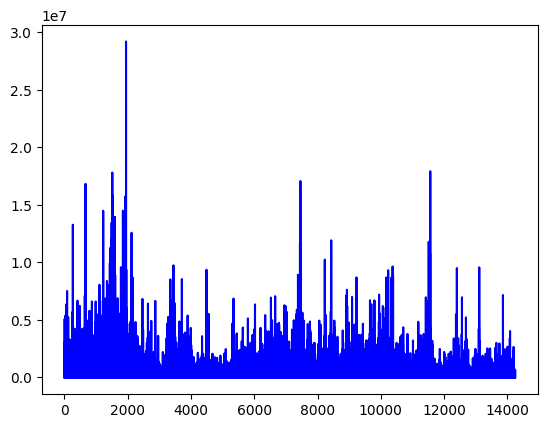

In [29]:
pred  = scaler.inverse_transform(stockdata)
plt.plot(pred,color='blue')
plt.show()

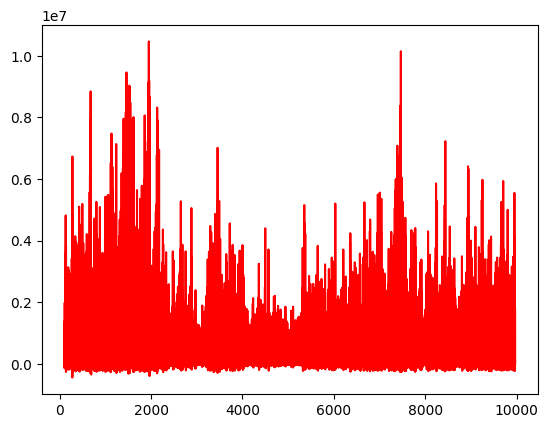

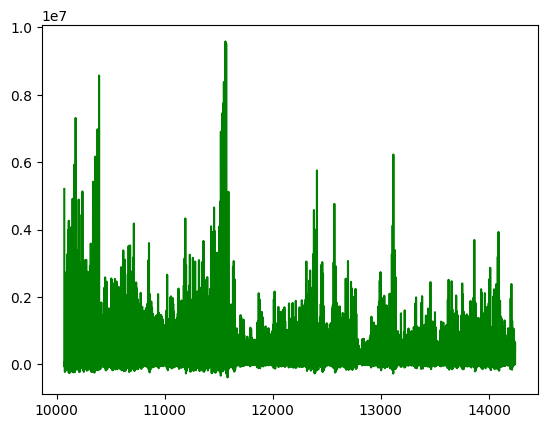

In [30]:
plt.plot(trPrPlot,color='red')
plt.show()
plt.plot(tsPrPlot,color='green')
plt.show()

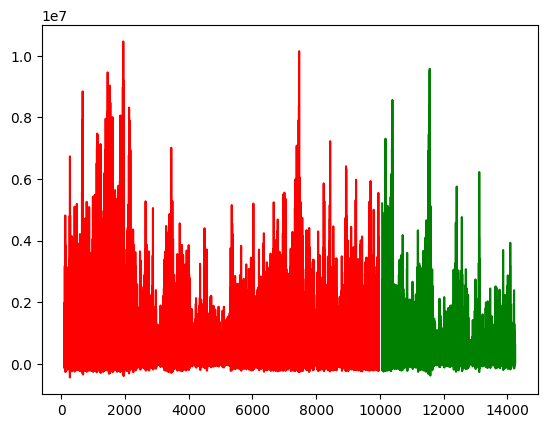

In [31]:
plt.plot(trPrPlot,color='red')
plt.plot(tsPrPlot,color='green')
plt.show()

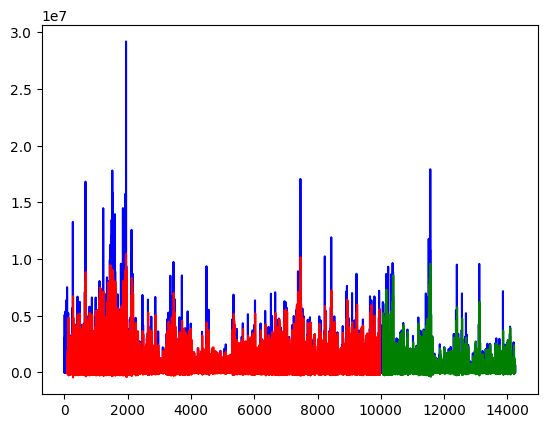

In [32]:
plt.plot(pred,color='blue')
plt.plot(trPrPlot,color='red')
plt.plot(tsPrPlot,color='green')
plt.show()